<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Why" data-toc-modified-id="The-Why-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Why</a></span></li><li><span><a href="#Importing-Libraries-" data-toc-modified-id="Importing-Libraries--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Libraries <a name="anc1" rel="nofollow"></a></a></span></li><li><span><a href="#Dealing-with-Nan-Values" data-toc-modified-id="Dealing-with-Nan-Values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dealing with Nan Values</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Removing-outliers" data-toc-modified-id="Removing-outliers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Removing outliers</a></span><ul class="toc-item"><li><span><a href="#Feature-Transformation" data-toc-modified-id="Feature-Transformation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Feature Transformation</a></span></li></ul></li><li><span><a href="#Initial-Data-Visualization" data-toc-modified-id="Initial-Data-Visualization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Initial Data Visualization</a></span><ul class="toc-item"><li><span><a href="#Heat-Mapping" data-toc-modified-id="Heat-Mapping-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Heat Mapping</a></span></li><li><span><a href="#PairPlotting" data-toc-modified-id="PairPlotting-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>PairPlotting</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Feature-scalling" data-toc-modified-id="Feature-scalling-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Feature scalling</a></span></li></ul></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Training</a></span><ul class="toc-item"><li><span><a href="#Spliting-our-Data" data-toc-modified-id="Spliting-our-Data-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Spliting our Data</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# The Why
Knowing the mix ratio for concrete to obtain a specific strength in MPa is a strenuous task that requires lots of trails especially for high strength concrete. Based on common materials and methods, we thus present an ML approach to limit the mix trails.
The materials are Blast,Cement,Coarse Aggregate, Fine Aggregate,Fly ash, Superplasticizers and Water all in  m^3 . 
The method is Age in days
The result is Compressive Strength in MPa

# Importing Libraries <a name="anc1"></a>

In [309]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import scipy.stats as scp
%matplotlib inline
from math import floor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [310]:
#Reading the CSV file from system
All_concrete = pd.read_csv("../concrete.csv")


In [311]:
All_concrete.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [312]:
All_concrete.shape  #gives the shape of the dataset array

(1030, 9)

In [313]:
types = All_concrete.dtypes
nonFloat = All_concrete.dtypes[types == str]
print(f"Non-integer types are {nonFloat}")

Non-integer types are Series([], dtype: object)


In [314]:
All_concrete.head() #sampling to get a glimpse of the data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


The dataset is of different units of float

In [315]:
All_concrete.describe() 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Dealing with Nan Values

In [316]:
All_concrete.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


There are non-null values in the whole dataset. This makes the whole process smoother

# Data cleaning

In [317]:
duplicates = All_concrete[All_concrete.duplicated()]
duplicates.shape


(25, 9)

In [318]:
All_concrete = All_concrete[~All_concrete.duplicated(keep='first')] #removing duplicates from the dataset
All_concrete.shape
cols = All_concrete.columns

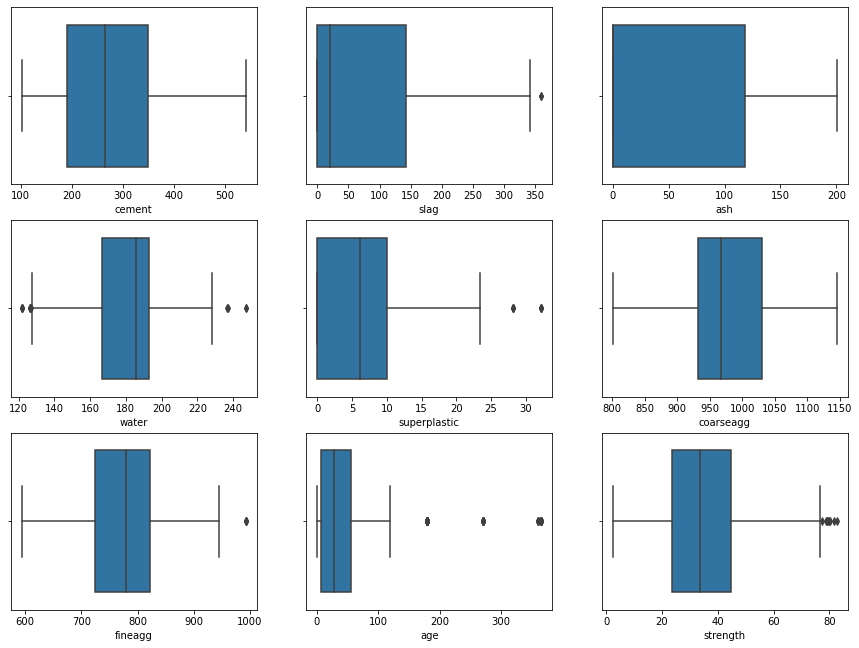

In [319]:
#creating a boxplot function for easy visualization and cleaning for every column in the dataset
def boxPlot():
    f = plt.figure(figsize=(15,15))
    cols = All_concrete.columns
    flr = floor(len(cols)/3) +1
    for col in cols:
        plt.subplot(flr,3,list(cols).index(col)+1)
        sns.boxplot(All_concrete[col])
    plt.show()
boxPlot()

Fine aggregate really has much outliers below the first quartile. A testimony that the removed outlier has greatly affected the mean before. We might adjust this by other measures. Age is also normally tested within the first 21 days. Thus we see the density skewed to those region. We might also 'engineer' it to achieve better normal distribution.

# Removing outliers

Testing of concrete at high number of days is not really the ideal and based on the normal distribution of concrete strength, the values won't differ much from third deviation from mean.
Fine aggregate has one point outlier which is conspicous.
Excessive water too is not really the ideal.

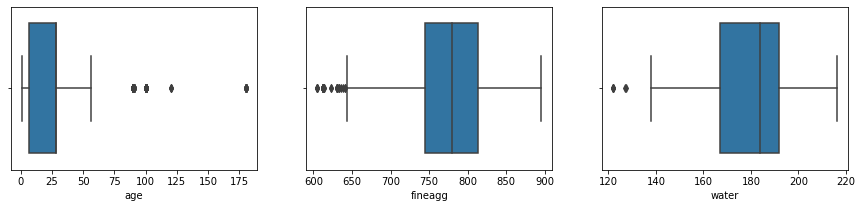

In [320]:

#dropping outliers using standard deviation

# As there is one extreme outlier...
maxfineAgg = All_concrete['fineagg'].max()
All_concrete = All_concrete[(All_concrete['fineagg'] < maxfineAgg)]


def outlierRemover(column,data):
    upperLimit = data[column].mean() + 3*data[column].std()
    lowerLimit = data[column].mean() - 3*data[column].std()
    data = data[(data[column] < upperLimit) & (data[column] > lowerLimit)]
    return data
def outlierRemoverQuatile(column,data):
    q3 = data[column].quantile(0.95)
    data = data[(data[column] < q3)]
    return data

All_concrete = outlierRemover('age',All_concrete)
#experimentally, removing only the upperbound for age returns thesame shape
All_concrete = outlierRemoverQuatile("fineagg",All_concrete)


All_concrete = outlierRemoverQuatile("water",All_concrete)
All_concrete.shape

#box-plots again....
def ageWaterFine():
    f = plt.figure(figsize=(15,3))
    plt.subplot(1,3,1)
    sns.boxplot(All_concrete['age'])
    plt.subplot(1,3,2)
    sns.boxplot(All_concrete['fineagg'])
    plt.subplot(1,3,3)
    sns.boxplot(All_concrete['water'])
ageWaterFine()
plt.show()


## Feature Transformation

In [321]:

minfineAgg = All_concrete['fineagg'].min()
minfy =  All_concrete[(All_concrete['fineagg'] == minfineAgg)].shape
print(minfy)
All_concrete['age'] = All_concrete['age']**0.3
All_concrete["fineagg"] = (All_concrete['fineagg']**2)/1000


(5, 9)


we have reduced the outliers by modifying the features.

In [322]:
#getting a glimpse of zero valued entries 
shapeOfAll = All_concrete.shape
zeroValues = map(lambda x: len(All_concrete[x][All_concrete[x] ==0]),All_concrete.columns)
zeroValues = np.array(list(zeroValues))
zeroValuesPercentage = zeroValues/shapeOfAll[0]
print(zeroValues/shapeOfAll[0])

[0.         0.46788991 0.51605505 0.         0.33486239 0.
 0.         0.         0.        ]


In [323]:
zeroDataFrame

,column,PercentageOfZeros
0,cement,0.000000
1,slag,0.487646
2,ash,0.501951
3,water,0.000000
4,superplastic,0.323797
5,coarseagg,0.000000
6,fineagg,0.000000
7,age,0.000000
8,strength,0.000000
9,cement_slag,0.000000


Flyash has the most zero values and is least represented followed by Slag. Ash can be used to reduce water requirement and more workability thus its usage is secondary. Slag substitutes cement which can also be secondary in usage too.

# Initial Data Visualization

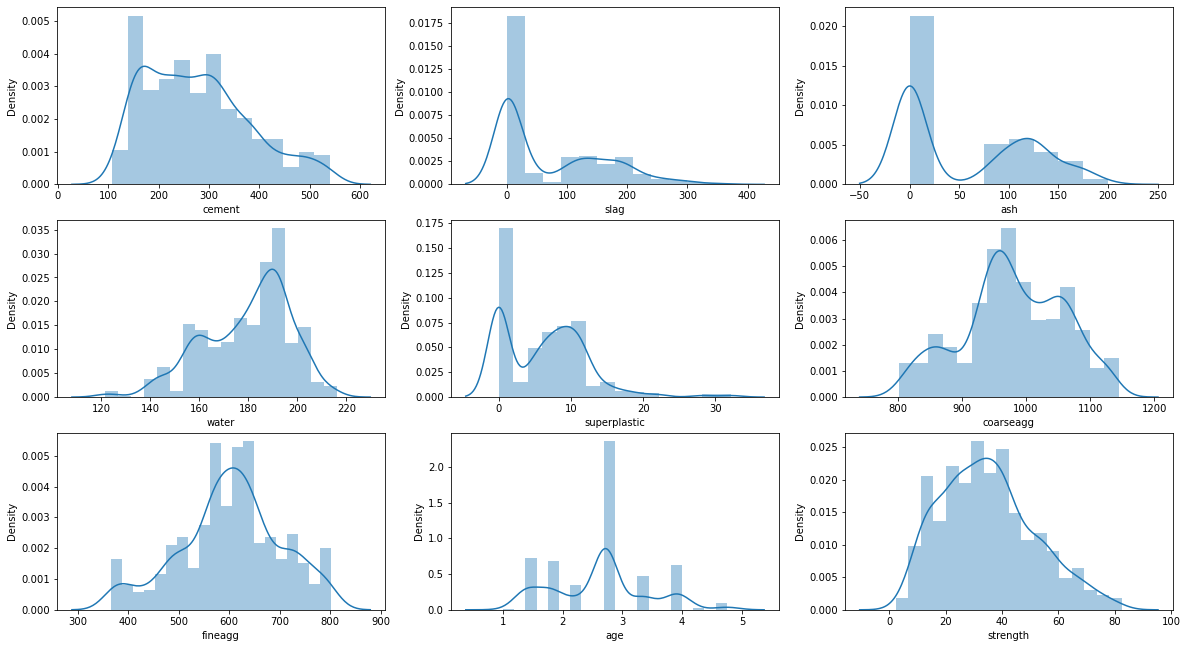

In [324]:
f = plt.figure(figsize=(20,15))
for col in cols:
    flr = floor(len(cols)/3) +1
    plt.subplot(flr,3,list(cols).index(col)+1)
    sns.distplot(All_concrete[col])
plt.show()

It can be seen that cement is skewed to the left. Water,fineagg, coarseagg and strength are approximately normally distributed. Superplastic, ash and slag are conspicuously positively skewed. Age is also positively skewed

In [325]:
#unique values in age
uniqueAges = (All_concrete['age'].unique())
uniqueAges.reshape(1,-1)

array([[2.71736145, 2.20718335, 1.79278996, 3.34546436, 1.39038917,
        3.98107171, 3.87001294, 3.85720528, 4.74877673, 4.20488743,
        1.        ]])

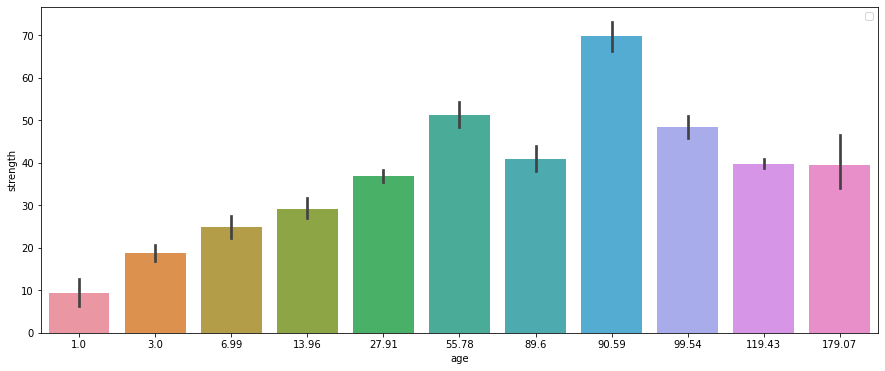

In [326]:
f = plt.figure(figsize=(15,6))
roundedAge = np.round(All_concrete['age']**3.33,2)
sns.barplot(x=roundedAge, data=All_concrete, y='strength')
plt.legend([],[], frameon=True)
plt.show()

91 days has the most value thus we see that most tests in this sample are done on the 91st day followed by the 56th day. Thus we might have had a false impression that outlier days like days greater than 180days doesn't have much tests for strength. For example, tests on day 180 are more than those of third day. We should endeavor not to remove those seeming outliers.

## Heat Mapping

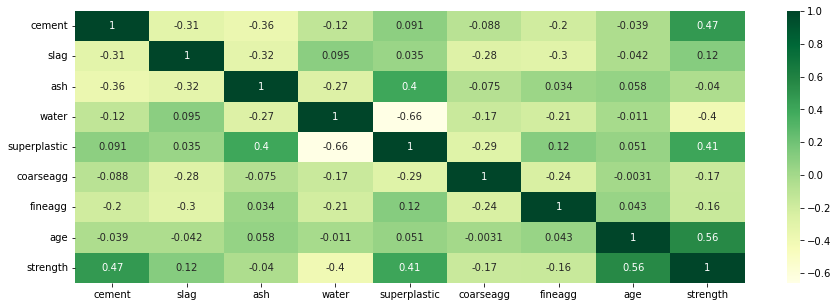

In [327]:
plt.figure(figsize=(15,5))
cor_matrix = All_concrete.corr()
sns.heatmap(cor_matrix,annot=True, cmap="YlGn")
plt.show()

From the heatMap, it can be inferred that:
. Quantity of cement,amount of superplastic and Age greatly influnce the strength of concrete.
. Slag has small positive correlation.
. Water quantity also has high influnce but a negative correlation which is reasonable.
. Ash, coarse and fine aggregate all have small negative correlation with ash having the least.

    It can also be observed that superplastic and water have strong negative corelation. Superplasticizers work to decrease the water cement ratio hence also increasing workability of concrete.

## PairPlotting

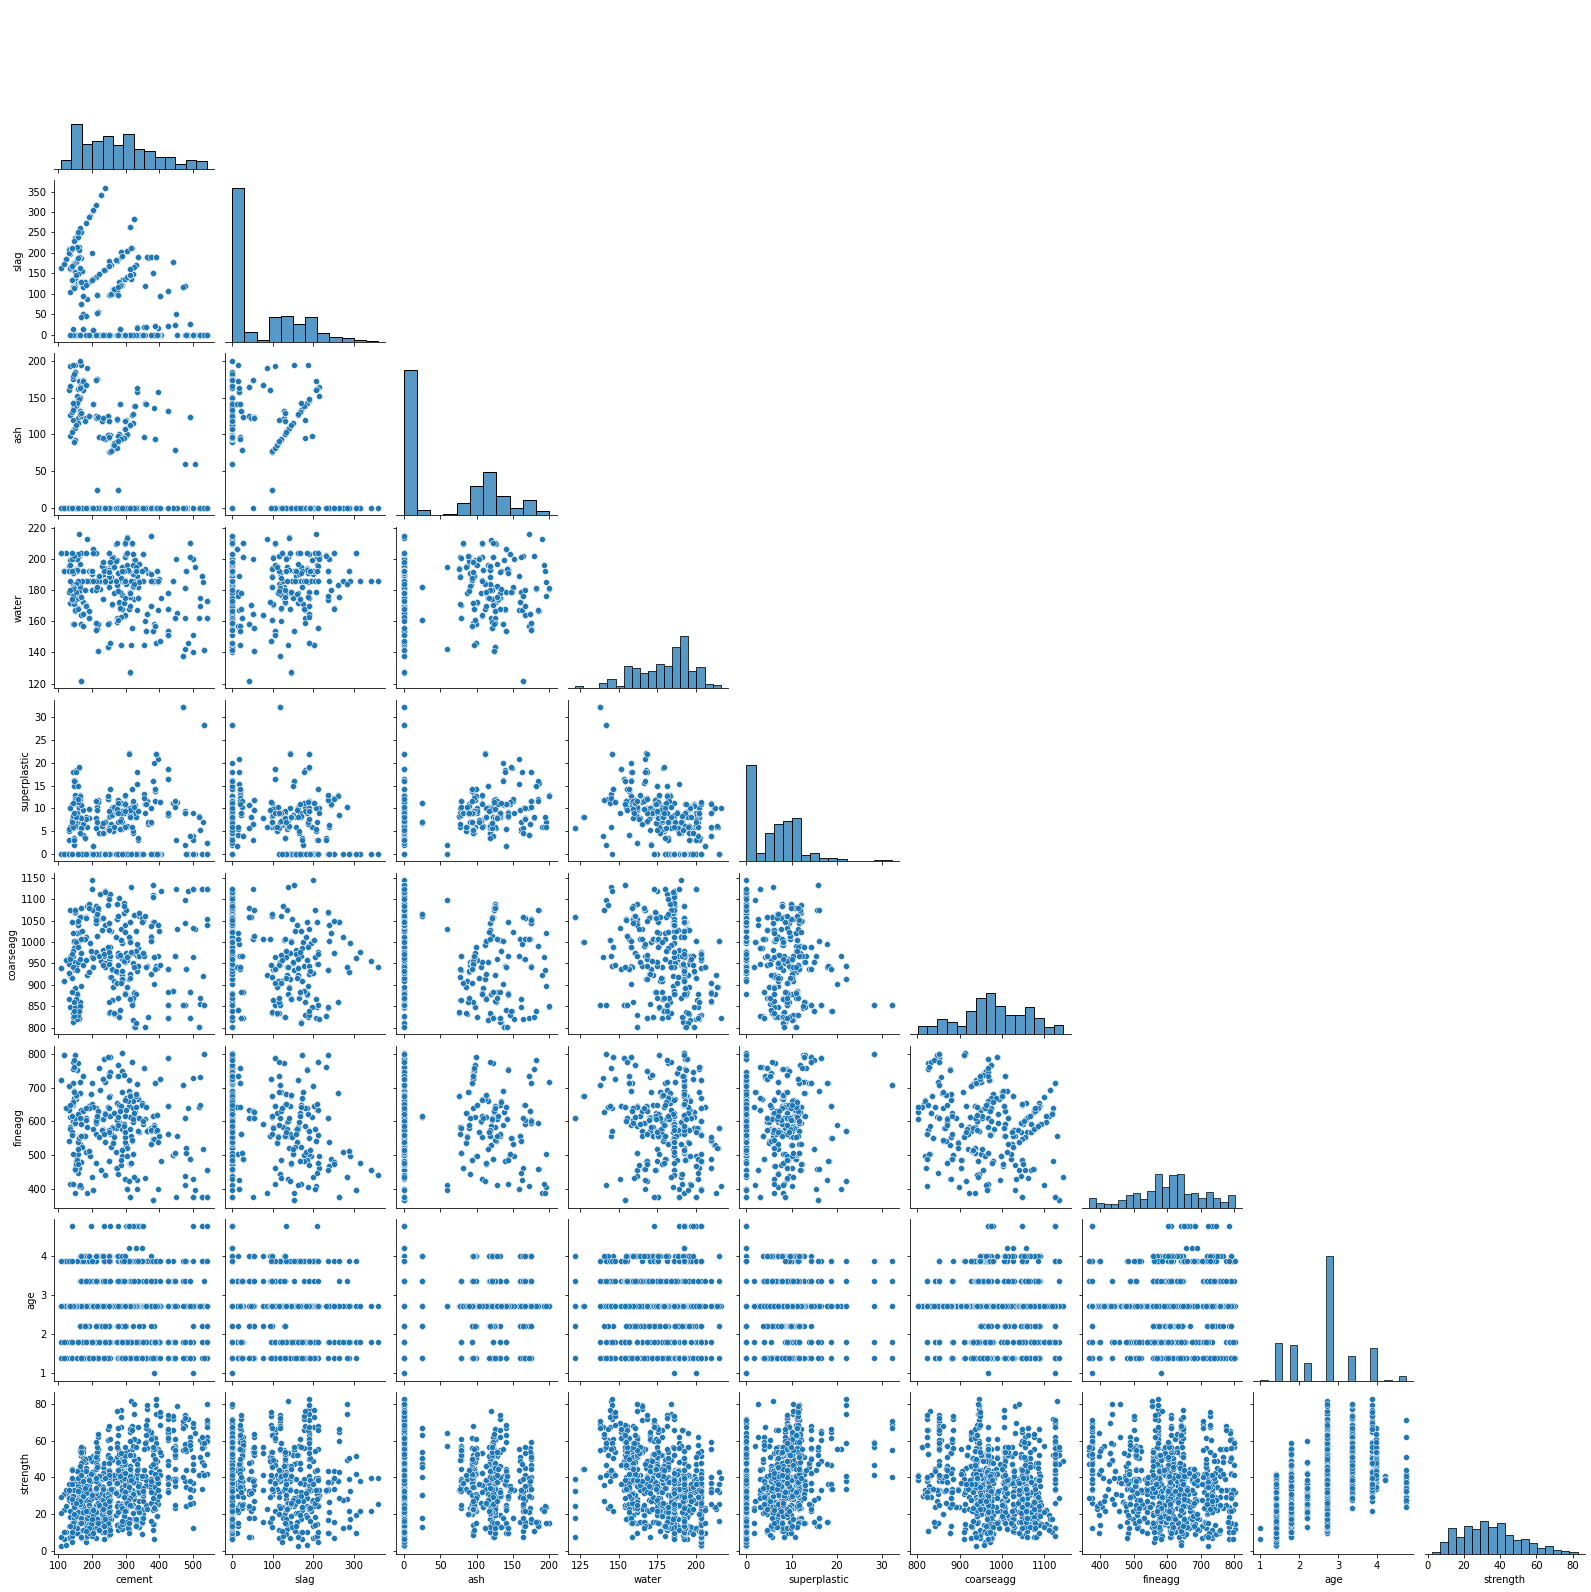

In [328]:
sns.pairplot(All_concrete, corner=True)
plt.show()

It can be observed that no two features have exempting strenght have reasonable correlation. 

ON STRENGTH
    
Cement has a good positive correlation pattern relative to others assuming homoscedasticity.
Superplastic plot with strength also show some correlation in the scatter plot.
Age as can be counted has finite groups of point segments.
Others have weak correlation representations in the plots as noticed earlier in the heatmap.


# Feature Engineering
    
Based on component of cementitious component = cement, cement + Slag
Based on water-cemnt ratio = water/cement
Based on ratio of water to cementitious component = water/cement+ Slag
Based on component for increasing workability = water + superplastic, flyash + superplastic
Based on volume of aggregate = coarse + fine


In [329]:
#so we engineer ...
All_concrete['cement_slag'] =  All_concrete['cement'] + All_concrete['slag']
All_concrete['water_cement'] =  All_concrete['water']/ All_concrete['cement']
All_concrete['water_cementitious'] = All_concrete['water'] / All_concrete['cement_slag']
All_concrete['water_superplastic'] =  All_concrete['water'] + All_concrete['superplastic']
All_concrete['flyash_superplastic'] =  All_concrete['ash'] + All_concrete['superplastic']
All_concrete['allAggregates'] =  All_concrete['fineagg'] + All_concrete['coarseagg']

#cementitious['str']= All_concrete['strength']
print(All_concrete.shape)

(872, 15)


Let us perform P-test on all features to determine their significance at 95% confidence level wrt to significant impact on the dependent variable STRENGTH.
    
We may end up removing some features with high P values
        
We should at this point create our dependent and independent variables from All_concrete and also split our data.

## Feature Selection

In [330]:
#we perform a statistical test to know the properties of our dataframe like skewness, feature significance etc
X = All_concrete.drop(['strength'], axis=1)
y = All_concrete['strength']
t,p_test = scp.ttest_ind(a = y.to_numpy(), b = X['ash'].to_numpy())
print("{:.6f}".format(t))

#X_ols = X.iloc[:,:X.shape[1]].values
#X_ols = np.append(arr = np.ones((X.shape[0],1)).astype(int), values=X_ols, axis=1)
#performing  OLS
X_ols2 = sm.add_constant(X)
result = sm.OLS(y, X_ols2).fit()
print(result.summary())

-10.354898
                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     405.8
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          1.04e-317
Time:                        11:12:04   Log-Likelihood:                -2924.0
No. Observations:                 872   AIC:                             5870.
Df Residuals:                     861   BIC:                             5923.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -

We have very high F-statistic probabablity which means that our variables explain our independent variables and we can reject the null hypothesis that they do not relate at 95% confidence level.
    
Age has high coefficient of 11.98 relatively due to the fact that we have modified it to adjust normally.
    
By Prob(Omnibus) , the residuals are normally distributed.
 The homoscedasticity is also less than 2 which is ideal.
 By Prob(JB), we also accept that data is normally distributed.
 The condition number  is also very high indicating high multicollinearity.
 
 
 We should also drop some engineered variables with P values > 0.05

In [331]:
X = X.drop(['water_superplastic'], axis= 1)


## Feature scalling

Some features like coarseagg, fineagg are 10 folds of the others. To ensure quick convergence , we should rescale

In [332]:

scaler = StandardScaler()
anX = scaler.fit_transform(X)
anX[1,:]

array([-1.0476908 , -0.35151518,  1.01515455, -1.20435636,  0.75852825,
        1.28557903,  0.31362427, -0.51526475, -1.23139847,  0.61480995,
        0.88983666,  1.04228255,  1.1898967 ])

# Model Training

## Spliting our Data 

In [333]:
#splitting at 70% train size
X_train, X_test, y_train, y_test = train_test_split(anX,y, train_size=0.7, random_state=2)


In [334]:
#fiting simple linear regression model
linMod = LinearRegression()
linMod.fit(X_train,y_train)

trainScore = linMod.score(X_train ,y_train)
testScore = linMod.score(X_test ,y_test)
r2Score = metrics.mean_squared_error(y_train, linMod.predict(X_train), squared= False)
print(f'train score is: {trainScore}')
print(f'test score is: {testScore}')
print(r2Score)

#store the results in a dataframe
resultDF = pd.DataFrame()
resultDF = pd.DataFrame({'model':'linearReg','r2Score':r2Score,'Train Performance':trainScore,\
                         'Test performance':testScore},index=[1])


train score is: 0.8352866009859021
test score is: 0.7883353276849391
6.802789747806665


This, we have slight overfitting with it. 

In [335]:
# fitting with Lasso and Ridge with polynomials 
def linearmethods(name, method,ind):
    apipe = Pipeline([('polynomial',PolynomialFeatures(degree=2,interaction_only=True)),(name,method)])
    #fitting model
    apipe.fit(X_train,y_train)
    trainScore =apipe.score(X_train,y_train)
    testScore = apipe.score(X_test,y_test)
    r2score =metrics.mean_squared_error(y_train, apipe.predict(X_train), squared= False)
    data_temp = pd.DataFrame({'model':name,'r2Score':r2Score,'Train Performance':trainScore,\
                             'Test performance':testScore},index=[ind])
    return data_temp
    
ridgeReg = RidgeCV(alphas = [0.01,0.1,1,3],cv=5)
lassoReg = LassoCV(alphas = [0.01,0.1,1,3],cv=5)
lmRidge = linearmethods('RidgeCV',ridgeReg,2)
resultDF = pd.concat([resultDF,lmRidge])
lmLasso = linearmethods('LassoCV',lassoReg,3)
resultDF = pd.concat([resultDF,lmLasso])

resultDF

,model,r2Score,Train Performance,Test performance
1,linearReg,6.80279,0.835287,0.788335
2,RidgeCV,6.80279,0.903126,0.845669
3,LassoCV,6.80279,0.902746,0.844181


In [336]:
#for easy addition into dataframe, we create a result updater 

def resultUpdater(name,method):
    if not (name in resultDF['model'].unique()):
        r2score =metrics.mean_squared_error(y_train, method.predict(X_train), squared= False)
        resultDF.loc[len(resultDF.index)+1] = [name,r2score,method.score(X_train, y_train),method.score(X_test, y_test)]


In [337]:
svc = SVR()
svc_params = {'kernel':('rbf', 'linear', 'quadratic'), 'C':[30,90,100,150,300]}
grid_svr_cv = GridSearchCV(svc, svc_params, cv=5)
grid_svr_cv.fit(X_train, y_train)
grid_svr = grid_svr_cv.best_estimator_
grid_svr.fit(X_train, y_train)
print(grid_svr_cv.best_params_)

{'C': 90, 'kernel': 'rbf'}


In [338]:

# r2score =metrics.mean_squared_error(y_train, grid_svr.predict(X_train), squared= False)
# resultDF.loc[len(resultDF.index)+1] = ['SVR',r2score,grid_svr.score(X_train, y_train),grid_svr.score(X_test, y_test)]
# resultDF
resultUpdater('SVR',grid_svr)
resultDF

,model,r2Score,Train Performance,Test performance
1,linearReg,6.802790,0.835287,0.788335
2,RidgeCV,6.802790,0.903126,0.845669
3,LassoCV,6.802790,0.902746,0.844181
4,SVR,2.917863,0.969697,0.877793


We notice an overfitting in support vector regression as the test score is considerably lesser than the train score

We thus try lazy regressor; KNN regressor

In [339]:
neighs = KNeighborsRegressor(n_neighbors=3)
neighs.fit(X_train,y_train)
resultUpdater('KNN',neighs)
# r2score =metrics.mean_squared_error(y_train, neighs.predict(X_train), squared= False)
# resultDF.loc[len(resultDF.index)+1] = ['KNN',r2score,neighs.score(X_train, y_train),neighs.score(X_test, y_test)]
resultDF

,model,r2Score,Train Performance,Test performance
1,linearReg,6.802790,0.835287,0.788335
2,RidgeCV,6.802790,0.903126,0.845669
3,LassoCV,6.802790,0.902746,0.844181
4,SVR,2.917863,0.969697,0.877793
5,KNN,4.373468,0.931922,0.816808


The K Neighbours method performed worse on the test and train datasets than SVR and the linear methods above. SVR is thus the best so far.

We thus try ensemble methods with bagging

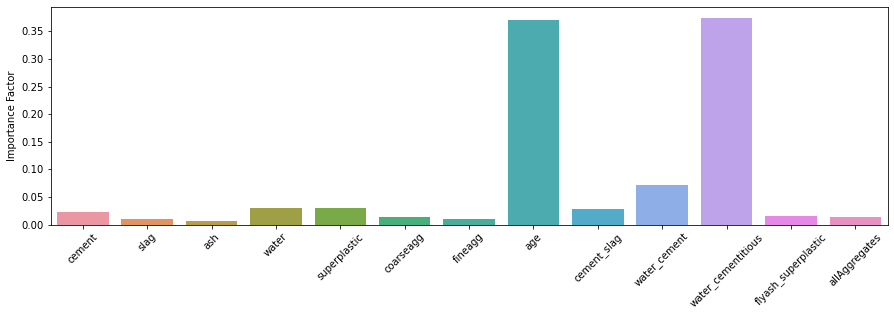

In [340]:
RFR = RandomForestRegressor(n_estimators=150,max_depth=15, random_state=0)
#fit the model
RFR.fit(X_train,y_train)
#plot the feature importance with sns and update the dataframe results
plt.figure(figsize=(15,4))         
ax = sns.barplot(x =X.columns ,y = RFR.feature_importances_)
ax.tick_params(axis='x', rotation=45)
plt.ylabel('Importance Factor')
plt.show()
resultUpdater('RandomForest',RFR)


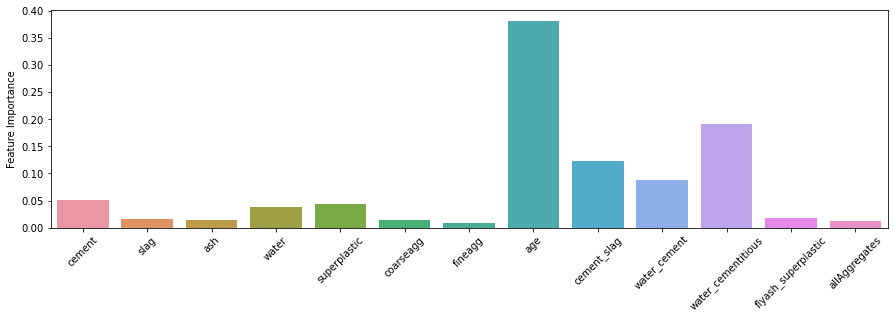

,model,r2Score,Train Performance,Test performance
1,linearReg,6.802790,0.835287,0.788335
2,RidgeCV,6.802790,0.903126,0.845669
3,LassoCV,6.802790,0.902746,0.844181
4,SVR,2.917863,0.969697,0.877793
5,KNN,4.373468,0.931922,0.816808
6,RandomForest,1.970360,0.986182,0.896830
7,ExtraTrees,0.600697,0.998716,0.888227


In [341]:
ETR = ExtraTreesRegressor(max_depth=15, random_state=1)
ETR.fit(X_train,y_train)
#plot the feature importance with sns and update the dataframe results
plt.figure(figsize=(15,4))
ax = sns.barplot(x =X.columns ,y = ETR.feature_importances_)
ax.tick_params(axis='x', rotation=45)
plt.ylabel('Feature Importance')
plt.show()
resultUpdater('ExtraTrees',ETR)
resultDF

The RandomForestRegressor(RFR) performed better with a significantly reduced rmse error but the overfitting factor is still noticed with almost 10% difference in performance 
The results from ExtraTreesRegressor(ETR) is the best so far with over 99.9% trainset performance and almost 90% perfrmance on test set.

    Juxtaposing ETR and RFR shows that they both have almost thesame consideration for all features except for Age and Water_cementitious, cement_slag and water_cement. Indeed ETR spread its consideration for cement related features while RFR greatly considered water_cementitious above other feeatures with cement.

# Conclusion


1. We were able to come up with addtional features that are germane and helped with our model.

2. WE were able to predict the compressive strength by ordinary LSM with almost thesame test and train accuracy. This shows a nice model with accuracy of 82.7%.

3. Using regularization and higher order polynomials, we were able to improve our accuracy but at the expense of a bit overfitting.

4. Using Support Vector Mechanics, we got better. This was thanks to the Rbf kernel that helped us with domain transformation for a bettter result. The Standardization of features also helped to smoothen the SVR method.

5. We thus finally were able to atrain an accuracy of 89.7% on testing using ExtraTreesRegressor which is our highest accuracy.
